In [87]:
!pip install xgboost

In [1]:
import os
os.chdir("C:\DilipKumar\Machine Learning\KaggleCompetition\TitanicSurvival")

In [2]:
print(os.getcwd())

C:\DilipKumar\Machine Learning\KaggleCompetition\TitanicSurvival


In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load dataset & observe top 5 rows
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Observe the last 5 rows
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#Load Test dataset and observe top 5 rows
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# check the column info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#check the train data statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.shape

(891, 12)

In [10]:
test_df.shape

(418, 11)

In [11]:
train_df.isnull().values.any()

True

In [12]:
test_df.isnull().values.any()

True

In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
train_df['Age'].mean()

29.69911764705882

In [16]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace = True)

In [17]:
test_df['Age'].fillna(test_df['Age'].mean(),inplace = True)

In [18]:
#since more than 70% of values are null in both train & test, it can be dropped
train_df.drop(columns = ['Cabin'],inplace=True)

In [19]:
test_df.drop(columns = ['Cabin'],inplace=True)

In [20]:
#drop Passenger Id column
train_df.drop(columns = ['PassengerId'],inplace=True)
test_df.drop(columns = ['PassengerId'],inplace = True)

In [21]:
#Impute Embarked column in Train & Fare column in Test
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace = True)
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace = True)

In [22]:
#check null values again
train_df.isnull().values.any()

False

In [23]:
test_df.isnull().values.any()

False

In [24]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
train_df['Title'] = train_df['Name'].apply(lambda x : x.split(",")[1].strip().split(' ')[0])

In [26]:
train_df['Title']

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Title, Length: 891, dtype: object

In [27]:
test_df['Title'] = test_df['Name'].apply(lambda x : x.split(",")[1].strip().split(' ')[0])

In [28]:
train_df.drop(columns = 'Name',inplace = True)
test_df.drop(columns = 'Name',inplace = True)

In [29]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr.


In [30]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,3,male,34.5,0,0,330911,7.8292,Q,Mr.
1,3,female,47.0,1,0,363272,7.0000,S,Mrs.
2,2,male,62.0,0,0,240276,9.6875,Q,Mr.
3,3,male,27.0,0,0,315154,8.6625,S,Mr.
4,3,female,22.0,1,1,3101298,12.2875,S,Mrs.


In [31]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [32]:
test_df['Ticket'].describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

In [33]:
train_df.drop(columns = 'Ticket',inplace = True)
test_df.drop(columns = 'Ticket',inplace = True)

In [34]:
train_df['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [35]:
train_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [36]:
train_df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [37]:
train_df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [38]:
train_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [39]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [40]:
train_df['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [41]:
train_df['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Lady.          1
Mme.           1
the            1
Don.           1
Capt.          1
Ms.            1
Sir.           1
Jonkheer.      1
Name: Title, dtype: int64

In [42]:
train_df[['Title','Survived']]

,Title,Survived
0,Mr.,0
1,Mrs.,1
2,Miss.,1
3,Mrs.,1
4,Mr.,0
...,...,...
886,Rev.,0
887,Miss.,1
888,Miss.,0
889,Mr.,1


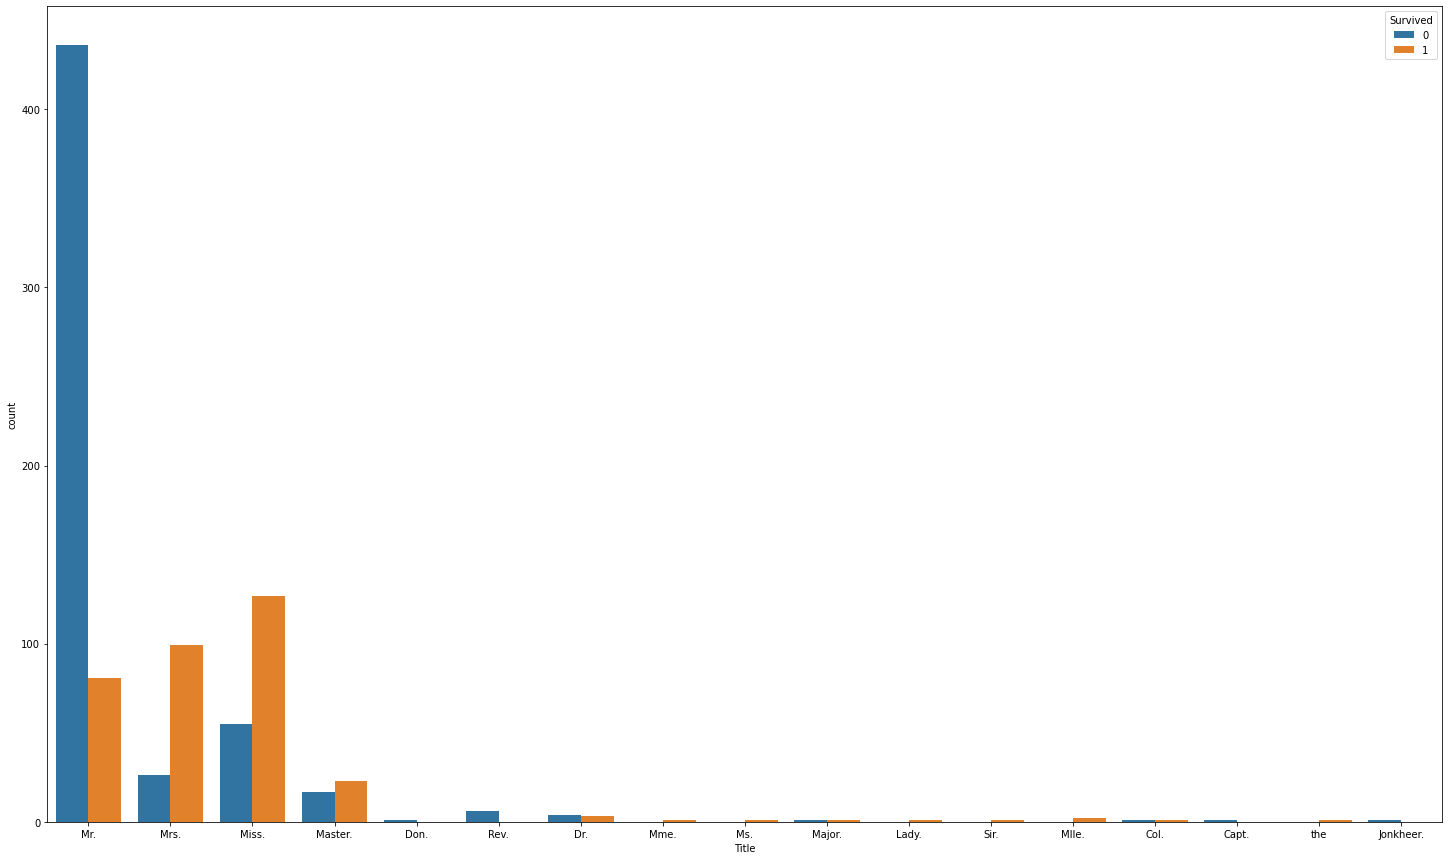

In [43]:
plt.figure(figsize=(25,15))
sns.countplot(x="Title", hue="Survived", data=train_df);

In [44]:
title_mapping = {
    "Mr.":0, "Mrs.":3, "Miss.":3, "Master.":1, "Don.":0, "Rev.":0, "Dr.":1, "Mme.":2,
       "Ms.":2, "Major.":0, "Lady.":2, "Sir.":1, "Mlle.":2, "Col.":0, "Capt.":0, "the":1,
       "Jonkheer.":0}
train_df['Title'] = train_df['Title'].map(title_mapping)

In [45]:
train_df['Title']

0      0
1      3
2      3
3      3
4      0
      ..
886    0
887    3
888    3
889    0
890    0
Name: Title, Length: 891, dtype: int64

In [46]:
test_df['Title'] = test_df['Title'].map(title_mapping)

In [47]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,3
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,0


In [48]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,0.0
1,3,female,47.0,1,0,7.0000,S,3.0
2,2,male,62.0,0,0,9.6875,Q,0.0
3,3,male,27.0,0,0,8.6625,S,0.0
4,3,female,22.0,1,1,12.2875,S,3.0


In [49]:
train_df['AgeBin'] = pd.cut(train_df['Age'],bins=[0,30,70,100],labels = ["Low","Med","High"])

In [50]:
train_df['AgeBin']

0      Low
1      Med
2      Low
3      Med
4      Med
      ... 
886    Low
887    Low
888    Low
889    Low
890    Med
Name: AgeBin, Length: 891, dtype: category
Categories (3, object): ['Low' < 'Med' < 'High']

In [51]:
test_df['AgeBin'] = pd.cut(test_df['Age'],bins=[0,30,70,100],labels = ["Low","Med","High"])

In [52]:
test_df['AgeBin']

0      Med
1      Med
2      Med
3      Low
4      Low
      ... 
413    Med
414    Med
415    Med
416    Med
417    Med
Name: AgeBin, Length: 418, dtype: category
Categories (3, object): ['Low' < 'Med' < 'High']

In [53]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBin
0,0,3,male,22.0,1,0,7.2500,S,0,Low
1,1,1,female,38.0,1,0,71.2833,C,3,Med
2,1,3,female,26.0,0,0,7.9250,S,3,Low
3,1,1,female,35.0,1,0,53.1000,S,3,Med
4,0,3,male,35.0,0,0,8.0500,S,0,Med


In [54]:
train_df.drop(columns=['Age'],inplace=True)
test_df.drop(columns=['Age'],inplace=True)

In [55]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeBin
0,0,3,male,1,0,7.2500,S,0,Low
1,1,1,female,1,0,71.2833,C,3,Med
2,1,3,female,0,0,7.9250,S,3,Low
3,1,1,female,1,0,53.1000,S,3,Med
4,0,3,male,0,0,8.0500,S,0,Med


In [56]:
train_df_X = train_df.drop('Survived',axis=1)

In [57]:
train_df_X

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeBin
0,3,male,1,0,7.2500,S,0,Low
1,1,female,1,0,71.2833,C,3,Med
2,3,female,0,0,7.9250,S,3,Low
3,1,female,1,0,53.1000,S,3,Med
4,3,male,0,0,8.0500,S,0,Med
...,...,...,...,...,...,...,...,...
886,2,male,0,0,13.0000,S,0,Low
887,1,female,0,0,30.0000,S,3,Low
888,3,female,1,2,23.4500,S,3,Low
889,1,male,0,0,30.0000,C,0,Low


In [58]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['AgeBin'])
train_df_X = encoder.fit_transform(train_df_X)
test_df = encoder.transform(test_df)

C:\Users\dilip-k\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [59]:
train_df_X

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeBin
0,3,male,1,0,7.2500,S,0,1
1,1,female,1,0,71.2833,C,3,2
2,3,female,0,0,7.9250,S,3,1
3,1,female,1,0,53.1000,S,3,2
4,3,male,0,0,8.0500,S,0,2
...,...,...,...,...,...,...,...,...
886,2,male,0,0,13.0000,S,0,1
887,1,female,0,0,30.0000,S,3,1
888,3,female,1,2,23.4500,S,3,1
889,1,male,0,0,30.0000,C,0,1


In [60]:
test_df

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeBin
0,3,male,0,0,7.8292,Q,0.0,2
1,3,female,1,0,7.0000,S,3.0,2
2,2,male,0,0,9.6875,Q,0.0,2
3,3,male,0,0,8.6625,S,0.0,1
4,3,female,1,1,12.2875,S,3.0,1
...,...,...,...,...,...,...,...,...
413,3,male,0,0,8.0500,S,0.0,2
414,1,female,0,0,108.9000,C,NaN,2
415,3,male,0,0,7.2500,S,0.0,2
416,3,male,0,0,8.0500,S,0.0,2


In [61]:
bin_encoder = ce.BinaryEncoder(cols=['Embarked','Sex'])
train_df_X = bin_encoder.fit_transform(train_df_X)
test_df = bin_encoder.transform(test_df)

C:\Users\dilip-k\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [62]:
train_df_X.head()

,Pclass,Sex_0,Sex_1,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Title,AgeBin
0,3,0,1,1,0,7.2500,0,0,1,0,1
1,1,1,0,1,0,71.2833,0,1,0,3,2
2,3,1,0,0,0,7.9250,0,0,1,3,1
3,1,1,0,1,0,53.1000,0,0,1,3,2
4,3,0,1,0,0,8.0500,0,0,1,0,2


In [63]:
test_df.head()

,Pclass,Sex_0,Sex_1,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Title,AgeBin
0,3,0,1,0,0,7.8292,0,1,1,0.0,2
1,3,1,0,1,0,7.0000,0,0,1,3.0,2
2,2,0,1,0,0,9.6875,0,1,1,0.0,2
3,3,0,1,0,0,8.6625,0,0,1,0.0,1
4,3,1,0,1,1,12.2875,0,0,1,3.0,1


In [64]:
train_df_X.isnull().values.any()

False

In [65]:
test_df.isnull().values.any()

True

In [66]:
test_df.isnull().sum()

Pclass        0
Sex_0         0
Sex_1         0
SibSp         0
Parch         0
Fare          0
Embarked_0    0
Embarked_1    0
Embarked_2    0
Title         1
AgeBin        0
dtype: int64

In [67]:
test_df['Title'].fillna(0,inplace=True)

In [68]:
train_df_X.shape,test_df.shape

((891, 11), (418, 11))

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
X = train_df_X
y = train_df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [71]:
sc = StandardScaler()

In [72]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import (DecisionTreeClassifier,ExtraTreeClassifier)
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, 
GradientBoostingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

### Combined Classifier models

In [75]:
clf = [KNeighborsClassifier(n_neighbors=13),DecisionTreeClassifier(),
      RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),
      ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10,learning_rate=1,max_features=3,max_depth=3,random_state=10),
                                 AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i],X_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
        print("Score of Model",clf[i],":",round(np.mean(score)*100,2))
model_fit()

Score of Model KNeighborsClassifier(n_neighbors=13) : 82.36
Score of Model DecisionTreeClassifier() : 79.93
Score of Model RandomForestClassifier(n_estimators=13) : 81.69
Score of Model GaussianNB() : 78.17
Score of Model SVC() : 83.32
Score of Model ExtraTreeClassifier() : 79.13
Score of Model GradientBoostingClassifier(learning_rate=1, max_features=3, n_estimators=10,
                           random_state=10) : 83.15
Score of Model AdaBoostClassifier() : 82.18
Score of Model ExtraTreesClassifier() : 80.73


In [76]:
from sklearn import metrics

### AdaBoost Classifier

In [77]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [78]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 0.7985074626865671


In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(probability=True,kernel='linear')
abc = AdaBoostClassifier(n_estimators=50,base_estimator=svc,learning_rate=1,random_state=0)
model2=abc.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test,y_pred))

Model Accuracy with SVC Base Estimator: 0.585820895522388


### SVC

In [84]:
clf1 = SVC()
clf1.fit(X_train,y_train)
prediction = clf1.predict(X_test)

In [85]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction))

Confusion Matrix:
 [[146  11]
 [ 40  71]]


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85       157
           1       0.87      0.64      0.74       111

    accuracy                           0.81       268
   macro avg       0.83      0.78      0.79       268
weighted avg       0.82      0.81      0.80       268



### Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,auc

In [81]:
learning_rates = [0.05,0.1,0.25,0.5,0.75,1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20,learning_rate=learning_rate,max_features=2,
                                   max_depth=2,random_state=0)
    gb.fit(X_train,y_train)
    print("Learning_Rate : ",learning_rate)
    print("Accuracy score of training:{0:.3f}".format(gb.score(X_train,y_train)))
    print("Accuracy score of training:{0:.3f}".format(gb.score(X_test,y_test)))
    print()

Learning_Rate :  0.05
Accuracy score of training:0.822
Accuracy score of training:0.806

Learning_Rate :  0.1
Accuracy score of training:0.803
Accuracy score of training:0.825

Learning_Rate :  0.25
Accuracy score of training:0.831
Accuracy score of training:0.836

Learning_Rate :  0.5
Accuracy score of training:0.836
Accuracy score of training:0.821

Learning_Rate :  0.75
Accuracy score of training:0.854
Accuracy score of training:0.817

Learning_Rate :  1
Accuracy score of training:0.849
Accuracy score of training:0.802



In [82]:
gb = GradientBoostingClassifier(n_estimators=20,learning_rate=0.75,max_features=2,
                               max_depth=2,random_state=0)
gb.fit(X_train,y_train)
predictions=gb.predict(X_test)

print("Confusion Matrix : ")
print(confusion_matrix(y_test,predictions))
print()
print("Classification Report")
print(classification_report(y_test,predictions))

Confusion Matrix : 
[[138  19]
 [ 30  81]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [83]:
y_scores_gb = gb.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test,y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.87


### XGBoost Classifier

In [88]:
import xgboost as xgb
xg = xgb.XGBClassifier(objective='binary:logistic',n_estimators=1000,seed=1)
xg.fit(X_train,y_train)
print(xg.predict(X_test))
xg.score(X_test,y_test)

C:\Users\dilip-k\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:41:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1
 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 0]


0.7761194029850746

SyntaxError: invalid character in identifier (<ipython-input-91-ac33418492ca>, line 2)

In [ ]:
passengerdf = pd.read_csv('test.csv')
final_preds = clf1.predict(test_df)

In [ ]:
final_preds

In [ ]:
submission_df = pd.DataFrame(columns=['PassengerId','Survived'])
submission_df['PassengerId'] = passengerdf['PassengerId']
submission_df['Survived'] = final_preds

In [ ]:
submission_df.to_csv('submissions_ver3.csv', header=True, index=False)

In [ ]:
submission_df.shape